# IBM Data Science Capstone Project:
## Data Analysis Issues in Complex Systems - Crime Data

### Introduction and Background
##### The role of a data scientist is to analyse and evaluate datasets in order to investigate, supporting evidence for or provide new insights into a particular topic either within a research setting or within a real-world application scenario. Here, I provided a very brief overview of how although data science provides an extra set of tools in the arsenal of data analysis methods available to researchers, there are limitations of any analysis toolkit in very complex systems. 

##### In this particular scenario I used the quantifiable prediction of crime as an example of a complex system where some predictive insights can be drawn from data, but due to the complexity of inputs that cause crimes and the limited amount of data available, producing a quantifiable predictive tool for crime on a large scale is challenging.

##### The main topics considered within this report are:
1. Crime in relation to weather. Pleasant hotter weather may lead to increases of certain crime types such as anti-social behaviour as many people are out of their homes leading to larger numbers of interactions with other people they would not normally interact with in hot weather.
2. Crime in relation to local events. As above, local popular events lead to large numbers of people interacting, potentially affecting certain crime types. 
3. Crime over time. Changes in policing policy may be reflected within large dataset.
4. Crime due to proximity to 'Public Houses' (pubs). Although alcohol is a well known cause of antisocial crime, whether the location of local pubs is an influence to location of certain crime types is briefly investigated. 
5. Predicting crime based on local area codes. The dataset is assessed for any possibility of predicting crime types over a short defined time period based on local area. 

##### I believe this topic would be of interest to anyone in the field of data science who is keen to apply data analysis methods in real world scenarios but also is interested in finding where the limits of data science are when either insufficient datasets or analysis methods are available. 

### Data Source Types and Use
##### I took and analysed data from the following sources and in the manner described below: 
- All available non-archived crime data available in the Gloucestershire area of the UK at the time of writing (https://data.police.uk/data/). From here I created several data frames with normalised and non-normalised data of crime types and crime outcomes per location over a 3 year time period by month and converted categorical data to numerical data for later analysis. Crimes that contained no data on latitude and longitude were discounted from the study, but missing data of crime types or outcome were still included. 
- Average UK temperature data over the same time period as the crime data (https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-climate-averages). Due to the small size of the data set the data was manually entered into several `list()` variables that were then used to create a dataframe. This data was then overlayed against normalised data of total crimes in the local area over time. 
- API calls from FourSquare.com (https://foursquare.com/developers/apps) for (pubs) that sell alcohol within a town of interest called Cheltenham Spa were overlaid on a map and visually compared to a dot plot map of crimes that were assumed could potentially be linked to increased alcohol consumption in a local area over a defined time period.

##### In terms of data exploration and evaluation, various maps, bar chart, line graph, waffle chart, K nearest neighbours (KNN) and Principle Component Analysis (PCA) methods were used as visualisation and analysis tools of the above data. For KNN evaluation, `sklearn metrics .accuracy_score()` was used. 


### Method 
##### Import appropriate libraries for initial investigation and basic visualisation:

In [ ]:
import numpy as np  
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
mpl.style.use('ggplot')
from sklearn import preprocessing

##### A .csv file was created out of a download from the previously mentioned police data website starting from the latest non-archived data in March 2017 till the lastest available at the time of writing, February 2020. 

##### A dataframe was created out of this data, where date format was altered and columns for year and month were created via a for loop from the appropriate column. missing data locations `Nan` were replaced with `"N/A"` strings and any data rows missing latitude or longitude location data were omitted from the rest of the data processing and report:

In [ ]:
df_incidents = pd.read_csv('Data_Crime_UK_Gloucestershire_Street.csv')

print('Dataset downloaded and read into a pandas dataframe!')

del df_incidents['Crime ID']
del df_incidents['Context']
df_incidents_nona = df_incidents 
df_incidents.rename(columns={'Crime type':'Crimetype'}, inplace=True)
df_incidents.rename(columns={'Last outcome category':'Lastoutcomecategory'}, inplace=True)
df_incidents_nona.rename(columns={'Crime type':'Crimetype'}, inplace=True)
df_incidents_nona.rename(columns={'Last outcome category':'Lastoutcomecategory'}, inplace=True)

date_year = []
for x in df_incidents_nona['Month']:
    date_year.append(x[0:4])
df_incidents_nona['Dateyear'] = date_year
date_month = []
for x in df_incidents_nona['Month']:
    date_month.append(x[5:])
df_incidents_nona['Datemonth'] = date_month

print(df_incidents_nona.shape)

df_incidents_nona.replace(np.nan, 'N/A', inplace=True)

df_incidents_nona = df_incidents_nona[df_incidents_nona.Latitude != 'N/A']
df_incidents_nona = df_incidents_nona[df_incidents_nona.Longitude != 'N/A']

print(df_incidents_nona.shape)

##### Additional dataframes were created seperately for crimes by year and month group:

In [ ]:
df_incidents_nona_2017 = df_incidents_nona[df_incidents_nona.Dateyear=="2017"]
df_incidents_nona_crime_counts_2017bymonth = pd.DataFrame(df_incidents_nona_2017.Datemonth.value_counts().rename(columns={'index': 'Month', '0': 'Crime Count'}))
print('2017 by month', '\n')
print(df_incidents_nona_crime_counts_2017bymonth)
df_incidents_nona_2018 = df_incidents_nona[df_incidents_nona.Dateyear=="2018"]
df_incidents_nona_crime_counts_2018bymonth = pd.DataFrame(df_incidents_nona_2018.Datemonth.value_counts().rename(columns={'index': 'Month', 'Datemonth': 'Crime Count'}))
print('2018 by month', '\n')
print(df_incidents_nona_crime_counts_2018bymonth)
df_incidents_nona_2019 = df_incidents_nona[df_incidents_nona.Dateyear=="2019"]
df_incidents_nona_crime_counts_2019bymonth = pd.DataFrame(df_incidents_nona_2019.Datemonth.value_counts().rename(columns={'index': 'Month', 'Datemonth': 'Crime Count'}))
print('2019 by month', '\n')
print(df_incidents_nona_crime_counts_2019bymonth)
df_incidents_nona_2020 = df_incidents_nona[df_incidents_nona.Dateyear=="2020"]
df_incidents_nona_crime_counts_2020bymonth = pd.DataFrame(df_incidents_nona_2020.Datemonth.value_counts().rename(columns={'index': 'Month', 'Datemonth': 'Crime Count'}))
print('2020 by month', '\n')
print(df_incidents_nona_crime_counts_2020bymonth)

df_2017bymonth = df_incidents_nona_crime_counts_2017bymonth.rename(columns={0: 'Total Crimes 2017', 'index':'Month'})
df_2018bymonth = df_incidents_nona_crime_counts_2018bymonth.rename(columns={0: 'Total Crimes 2018', 'index':'Month'})
df_2019bymonth = df_incidents_nona_crime_counts_2019bymonth.rename(columns={0: 'Total Crimes 2019', 'index':'Month'})
df_2020bymonth = df_incidents_nona_crime_counts_2020bymonth.rename(columns={0: 'Total Crimes 2020', 'index':'Month'})

df_2017bymonth.loc['02'] = [0]
df_2017bymonth.loc['01'] = [0]
df_2017bymonth.sort_index(inplace=True)

df_2020bymonth.loc['03'] = [0]
df_2020bymonth.loc['04'] = [0]
df_2020bymonth.loc['05'] = [0]
df_2020bymonth.loc['06'] = [0]
df_2020bymonth.loc['07'] = [0]
df_2020bymonth.loc['08'] = [0]
df_2020bymonth.loc['09'] = [0]
df_2020bymonth.loc['10'] = [0]
df_2020bymonth.loc['11'] = [0]
df_2020bymonth.loc['12'] = [0]
df_2020bymonth.sort_index(inplace=True)
df_2018bymonth.sort_index(inplace=True)
df_2019bymonth.sort_index(inplace=True)

df_allbymonth = df_2017bymonth
df_allbymonth['Total Crimes 2018'] = df_2018bymonth['Total Crimes 2018']
df_allbymonth['Total Crimes 2019'] = df_2019bymonth['Total Crimes 2019']
df_allbymonth['Total Crimes 2020'] = df_2020bymonth['Total Crimes 2020']
df_allbymonth

##### Temperature data was retrieved from the previously mentioned source and a dataframe was created for average UK temperatures from 2017 to 2019:

In [ ]:
temps2017 = [4.3, 6.2,8.5,9,13,15.9,16.5,15.6,13.5,12.3,7,5.1]
temps2018 = [5.3,3.1,4.9,9.5,12.9,15.9,18.7,16.7,13.8,10.7,8.2,6.8]
temps2019 = [4.2,6.9,7.9,9.1,11.2,14.3,17.6,17.1,14.3,10.1,6.5,6]
tempsbyyear = pd.DataFrame(temps2017)
tempsbyyear['Temp 2018'] = temps2018
tempsbyyear['Temp 2019'] = temps2019
tempsbyyear[''] = ['01','02','03','04','05','06','07','08','09','10','11','12']
tempsbyyear = tempsbyyear.set_index('').rename(columns={0:'Temp 2017'})
tempsbyyear

##### A bar chart (Image 1) was created to give a basic overview of total crimes by year month by month to look for any trends or patterns. A line graph of average UK temperatures was also created to view for a general pattern that matched the crime figures (Image 2):

In [ ]:
df_months = df_allbymonth
df_allbymonth.plot(kind='bar')
df_temps = tempsbyyear

plt.title('Total Crimes in Gloucestershire per month 03/2017-02/2020')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.text(0.5, 5500, 'Cheltenham Festival') 
plt.show()

tempsbyyear.plot(kind='line')
plt.title('Total Crimes in Gloucestershire per month 03/2017-02/2020')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.show()

##### As a potential pattern was observed the total crimes and temperature data was normalised and plotted together (Image 3), indicating that there is a general pattern observed of total crime vs average UK temperature but there is also a noticable difference in 2017, particularly March (further discussed in following sections):

In [ ]:
df_allandtemps = df_allbymonth
df_allandtemps['Temp2017'] = tempsbyyear['Temp 2017']
df_allandtemps['Temp2018'] = tempsbyyear['Temp 2018']
df_allandtemps['Temp2019'] = tempsbyyear['Temp 2019']
df = pd.DataFrame(df_allandtemps)
df

x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df = df.rename(columns={0:'Total Crimes 2017', 1:'Total Crimes 2018',2:'Total Crimes 2019',3:'Total Crimes 2020',4:'Temp2017',5:'Temp2018',6:'Temp2017'})
del df['Total Crimes 2020']
df.plot(kind='line')
plt.title('Total Crimes in Gloucestershire per month 03/2017-02/2020')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.show()

##### A brief assessment from print statements on the dataframes suggested that the type of crime may also be a contributing factor to the higher total crimes in particular months (Image 4).

##### A dictionary was then created out of the highest crime month to date and this was then used to plot a waffle chart (Image 5) of the associated crimes for the date March 2017 (appropriate libraries are also shown/re-imported for this feature so that the data could be looked at separately in another workbook separate to the intial line and bar charts):

In [ ]:
df_incidents_nona_jan = df_incidents_nona[df_incidents_nona.Datemonth=="01"]
print('Jan:','\n',df_incidents_nona_jan['Crimetype'].value_counts())
df_incidents_nona_feb = df_incidents_nona[df_incidents_nona.Datemonth=="02"]
print('Feb:','\n',df_incidents_nona_feb['Crimetype'].value_counts())
df_incidents_nona_mar = df_incidents_nona[df_incidents_nona.Datemonth=="03"]
print('Mar:','\n',df_incidents_nona_mar['Crimetype'].value_counts())
df_incidents_nona_apr = df_incidents_nona[df_incidents_nona.Datemonth=="04"]
print('Apr:','\n',df_incidents_nona_apr['Crimetype'].value_counts())
df_incidents_nona_may = df_incidents_nona[df_incidents_nona.Datemonth=="05"]
print('May:','\n',df_incidents_nona_may['Crimetype'].value_counts())
df_incidents_nona_jun = df_incidents_nona[df_incidents_nona.Datemonth=="06"]
print('Jun:','\n',df_incidents_nona_jun['Crimetype'].value_counts())
df_incidents_nona_jul = df_incidents_nona[df_incidents_nona.Datemonth=="07"]
print('Jul:','\n',df_incidents_nona_jul['Crimetype'].value_counts())
df_incidents_nona_aug = df_incidents_nona[df_incidents_nona.Datemonth=="08"]
print('Aug:','\n',df_incidents_nona_aug['Crimetype'].value_counts())
df_incidents_nona_sep = df_incidents_nona[df_incidents_nona.Datemonth=="09"]
print('Sep:','\n',df_incidents_nona_sep['Crimetype'].value_counts())
df_incidents_nona_oct = df_incidents_nona[df_incidents_nona.Datemonth=="10"]
print('Oct:','\n',df_incidents_nona_oct['Crimetype'].value_counts())
df_incidents_nona_nov = df_incidents_nona[df_incidents_nona.Datemonth=="11"]
print('Nov:','\n',df_incidents_nona_nov['Crimetype'].value_counts())
df_incidents_nona_dec = df_incidents_nona[df_incidents_nona.Datemonth=="12"]
print('Dec:','\n',df_incidents_nona_dec['Crimetype'].value_counts())

df_incidents_nona_201703 = df_incidents_nona[df_incidents_nona.Datemonth=="03"]
df_incidents_nona_201703 = df_incidents_nona_201703[df_incidents_nona.Dateyear=="2017"]

df_incidents_nona_201703 = df_incidents_nona_201703.Crimetype.value_counts().reset_index().rename(columns={'index': 'Crime type', 'Crimetype': 'Total number'})
df_incidents_nona_201703_dic = {k:v for k,v in zip(df_incidents_nona_201703['Crime type'],df_incidents_nona_201703['Total number'])}
df_incidents_nona_201703_dic

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

data = df_incidents_nona_201703_dic
fig = plt.figure(
    FigureClass=Waffle, 
    rows=15, 
    columns=30,
    figsize=(15,9),
    values=data,
    colors=('#990000','#FF3333','#FF9933', '#FFFF33', '#99FF33', '#33FF33', '#33FF99', '#33FFFF', '#3399FF','#3333FF','#9933FF','#FF33FF','#FF3399','#A0A0A0'),
    title={'label': 'Crime types during 03/2017', 'loc': 'center', 'fontsize':24},
    labels=["Crime type: {0} \nTotal number of cases: {1}".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize':10},
    starting_location='NW'
     
)
plt.show()



##### An initial cluster map (Image 6) for visualisation was created to look at the data per location within the time frame mentioned: 

In [ ]:
from folium import plugins

cheltenham_map = folium.Map(location = [latitude, longitude], zoom_start = 9)

incidents = plugins.MarkerCluster().add_to(cheltenham_map)

for datey, datem, lat, lng, crime, out in zip(df_incidents_nona.Dateyear, df_incidents_nona.Datemonth, df_incidents_nona.Latitude, df_incidents_nona.Longitude, df_incidents_nona.Crimetype, df_incidents_nona.Lastoutcomecategory):
    if (datey == '2017') and (datem == '03') and (crime == 'Anti-social behaviour'):
        folium.Marker(
            location=[lat, lng], 
            icon=None, 
            popup=crime+": "+out
        ).add_to(incidents)

cheltenham_map

##### Partly due to long-processing time or failed visualisations, the map was altered to just dot plots (Image 7) for a less visually impressive but easily to work with map:

In [ ]:
cheltenham_map2 = folium.Map(location = [latitude, longitude], zoom_start = 9)

incidents2 = folium.map.FeatureGroup()

for datey, datem, lat, lng, crime, out in zip(df_incidents_nona.Dateyear, df_incidents_nona.Datemonth, df_incidents_nona.Latitude, df_incidents_nona.Longitude, df_incidents_nona.Crimetype, df_incidents_nona.Lastoutcomecategory):
    if (datey == '2017') and (datem == '03') and (crime == 'Anti-social behaviour'):
        incidents2.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5,
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6
            )
        )

cheltenham_map2.add_child(incidents2)
cheltenham_map2

##### For the API call via FourSquare for pubs the appropriate libraries were imported or re-imported (for reasoning mentioned before) and the category extracted from the results of the call. The results were plotted onto a map (Image 8) for a basic visual comparison to the data points from `cheltenham_map2` with Red signifying the located town centre and blue dots for the pubs identified from the API call (Foursquare ID and secret not shown for privacy purposes):

In [ ]:
import requests 
import pandas as pd 
import numpy as np 
import random 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

from IPython.display import Image 
from IPython.core.display import HTML 
    
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Folium installed')
print('Libraries imported.')

CLIENT_ID = # Foursquare ID
CLIENT_SECRET = # Foursquare Secret
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

from geopy.exc import GeocoderTimedOut

address = 'Cheltenham spa'

geolocator = Nominatim()
try:
    location = geolocator.geocode(address)
    print(location.latitude, location.longitude)
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s"%(address, e.message))

latitude = location.latitude
longitude = location.longitude

latitude = location.latitude
longitude = location.longitude
search_query = 'Pub'
radius = 3000
print(search_query + ' .... OK!')

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

results = requests.get(url).json()
results

venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head()

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

dataframe_filtered.name

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Cheltenham spa',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

##### The data was then processed changing categorical data into numeric data. Data was then pre-processed for KNN assessment. KNN was used as it is an unsupervised learning technique that is effective in clustering data into groups that may have a relationship between them. This categoriesed data can then be used to assess if a prediction can be made on the test set compared to the training set. Multiple K were plotted against predictive accuracy score comparing the crime type vs available data (Image 9). Categorical data was also dropped prior to PCA assessment:

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#create a dictionary of the codes to allow a numeric representation of the code for later k means
LSOAcodekeys = list(df_incidents_nona['LSOA code'])
d = dict([(y,x+1) for x,y in enumerate(sorted(set(LSOAcodekeys)))])
LSOAcodevalues = [d[x] for x in LSOAcodekeys]
LSOAcodedic = dict(zip(LSOAcodekeys, LSOAcodevalues))

Crimekeys = list(df_incidents_nona['Crimetype'])
d = dict([(y,x+1) for x,y in enumerate(sorted(set(Crimekeys)))])
Crimevalues = [d[x] for x in Crimekeys]
Crimedic = dict(zip(Crimekeys, Crimevalues))

Lastoutkeys = list(df_incidents_nona['Lastoutcomecategory'])
d = dict([(y,x+1) for x,y in enumerate(sorted(set(Lastoutkeys)))])
Lastoutvalues = [d[x] for x in Lastoutkeys]
Lastoutdic = dict(zip(Lastoutkeys, Lastoutvalues))

df_test = df_incidents_nona[['LSOA code','Crimetype','Lastoutcomecategory','Dateyear','Datemonth']]
df_test = df_test[df_test['Dateyear']=='2017']
df_test = df_test[df_test['Datemonth']=='03']

#add that dictionary based key value to the dataframe for the unique values
df_test['LSOAcodenum'] = df_test['LSOA code'].map(LSOAcodedic)
df_test['Crimetypenum'] = df_test['Crimetype'].map(Crimedic)
df_test['Lastoutnum'] = df_test['Lastoutcomecategory'].map(Lastoutdic)

X = df_test[['LSOAcodenum']].values.astype(float)
y = df_test[['Crimetypenum']].values.astype(float)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

from sklearn import metrics

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    

mean_acc
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

k = 49
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

df_test.drop('Crimetype', axis=1, inplace=True)
df_test.drop('Lastoutcomecategory', axis=1, inplace=True)
df_test.head()

df_incidents_nona.drop('Month', axis=1, inplace=True)
df_incidents_nona.drop('Reported by', axis=1, inplace=True)
df_incidents_nona.drop('Falls within', axis=1, inplace=True)

LSOAcodekeys = list(df_incidents_nona['LSOA code'])
d = dict([(y,x+1) for x,y in enumerate(sorted(set(LSOAcodekeys)))])
LSOAcodevalues = [d[x] for x in LSOAcodekeys]
LSOAcodedic = dict(zip(LSOAcodekeys, LSOAcodevalues))

Crimekeys = list(df_incidents_nona['Crimetype'])
d = dict([(y,x+1) for x,y in enumerate(sorted(set(Crimekeys)))])
Crimevalues = [d[x] for x in Crimekeys]
Crimedic = dict(zip(Crimekeys, Crimevalues))

Lastoutkeys = list(df_incidents_nona['Lastoutcomecategory'])
d = dict([(y,x+1) for x,y in enumerate(sorted(set(Lastoutkeys)))])
Lastoutvalues = [d[x] for x in Lastoutkeys]
Lastoutdic = dict(zip(Lastoutkeys, Lastoutvalues))

Locationkeys = list(df_incidents_nona['Location'])
d = dict([(y,x+1) for x,y in enumerate(sorted(set(Locationkeys)))])
Locationvalues = [d[x] for x in Locationkeys]
Locationdic = dict(zip(Locationkeys, Locationvalues))

df_incidents_nona['LSOAcodenum'] = df_incidents_nona['LSOA code'].map(LSOAcodedic)
df_incidents_nona['Crimetypenum'] = df_incidents_nona['Crimetype'].map(Crimedic)
df_incidents_nona['Lastoutnum'] = df_incidents_nona['Lastoutcomecategory'].map(Lastoutdic)
df_incidents_nona['Locationnum'] = df_incidents_nona['Location'].map(Locationdic)

df_incidents_nona.drop('Unnamed: 0', axis=1, inplace=True)
df_incidents_nona.drop('Location', axis=1, inplace=True)
df_incidents_nona.drop('LSOA code', axis=1, inplace=True)
df_incidents_nona.drop('LSOA name', axis=1, inplace=True)
df_incidents_nona.drop('Crimetype', axis=1, inplace=True)
df_incidents_nona.drop('Lastoutcomecategory', axis=1, inplace=True)
df_incidents_nona.head()

##### Appropriate libraries were imported for PCA assessment of the last outcome of the crime vs location of crime committed. PCA was used to make an assessment of whether assuming that location of crime committed is one of the largest contributing factors, whether there is any obvious trend displayed or not for the outcome type (Image 10):

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_incidents_nona)
scaled_data = scaler.transform(df_incidents_nona)

pca = PCA(n_components=8)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,4],x_pca[:,7],c=df_incidents_nona['Lastoutnum'],cmap='rainbow')
plt.xlabel('First Principal Component - LSOACodenum')
plt.ylabel('Second Principal Component - Locationnum')

### Results
##### Image 1 below: The initial comparison of total crimes per month of several years indicated that there is a general trend that total crimes gradually increases towards June/July/August and decreases towards November/December/January. On the graph is also labelled 'Cheltenham Festival' - a famous horse racing festival that occurs during March each year where the population of Cheltenham Spa increases dramatically due to visitors for the event from all over the country and the rest of the world.

##### It is interesting to not that there was a spike of total crime during March in 2017 and that March in both 2018 and 2019 appears higher than in the following month April across each of the years, again suggesting a potential general trend of crime increase. 

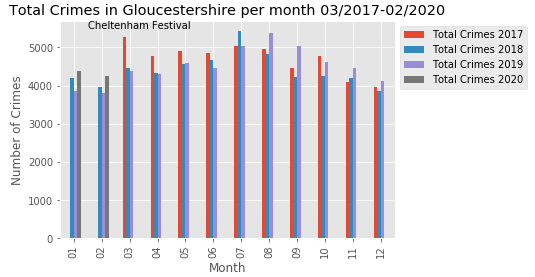

In [4]:
from IPython.display import Image
Image("Data_Crime_UK_Gloucestershire_Image 1.png")

##### Average UK temperature was retrieved from the MET office and plotted below in Image 2. the general increase and decrease trend as per each month seen on the crime graph appears to general follow the same trend. 

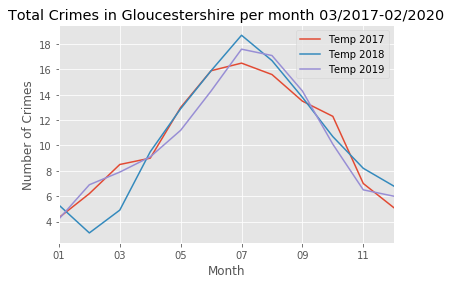

In [5]:
Image("Data_Crime_UK_Gloucestershire_Image 2.png")

##### To make a fair assessment, the data was normalised to each other and both total crimes and temperatures plotted against each other. As you can see from the below image 3, both 2018 and 2019 generally follow the same trends as per temperature change in respective years. However, our data also shows that as the old adage says "Correlation does not imply causation" as 2017 does not appear to follow the temperature trend (although their is a general slight decrease in the latter half of the year, total crimes are still disproportionally high). At this point the highest disproportionally high spike (March 2017) is explored in more detail in an attempt to assess what insights can be draw further from this data.
##### January is show as month 0 and december as month 11:

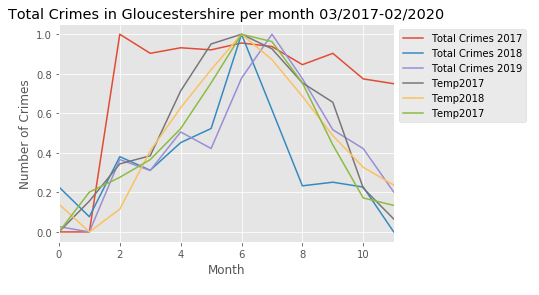

In [6]:
Image("Data_Crime_UK_Gloucestershire_Image 3.png")

##### A basic breakdown of each year by month from print statements (image 4) was a quick look method to indicate that the breakdown of crime type (not-shown) may be a contributing factor to the high total crime numbers spike. 

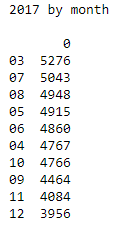

In [7]:
Image("Data_Crime_UK_Gloucestershire_Image 4.png")

##### A waffle chart (Image 5) was used to visualise the different crime types contributions to help identify what further assessments should be made. As the below demonstrates, by far the largest contributor was due to 'Anti-social behaviour', comparitably higher than in other months. A larger contribution in anti-social bahaviour crimes would tie in with the assumption that crime increases can be related to a large influx of people, however, as with temperature, we cannot look at these factors in isolation is such a complex system; we can only identify potential general trends until further analysis is performed.  

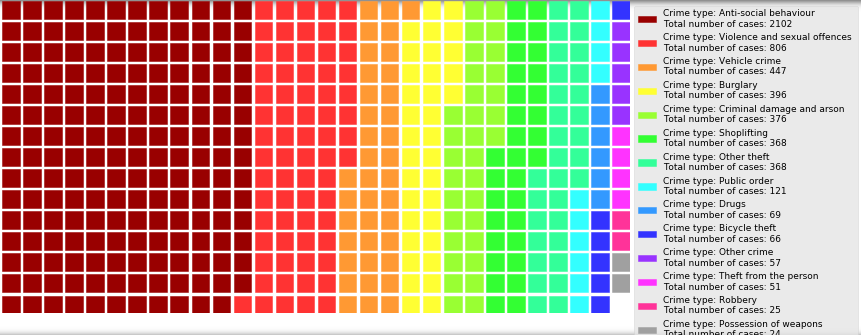

In [8]:
Image("Data_Crime_UK_Gloucestershire_Image 5.png")

##### A cluster map was then used to better visualise the locations and types of crimes and outcomes to help narrow down any further invetigations into variables that may correlate with crime type levels (Image 6).

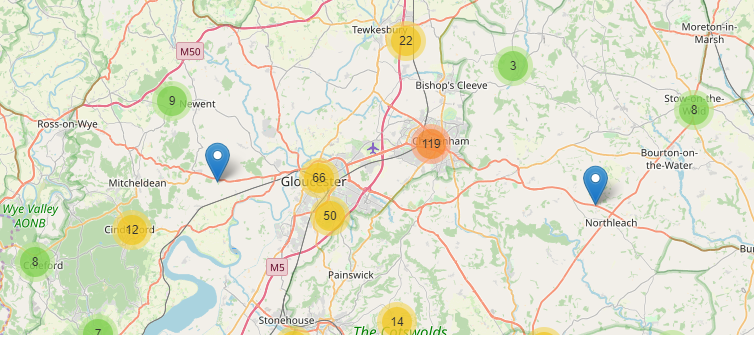

In [9]:
Image("Data_Crime_UK_Gloucestershire_Image 6.png")

##### Image 7 shows another map simply of dots plotted to the same locations, this sped up investigation as the map could be altered, processed and visualised much quicker than a more visually pleasing cluster map. This map better demonstrates that the crime time for anti-social behaviour is spread throughout town (blue dots with yellow halo), but appears to be more densily populated towards the town centre. based on this observation an API call for pubs in the area was required.

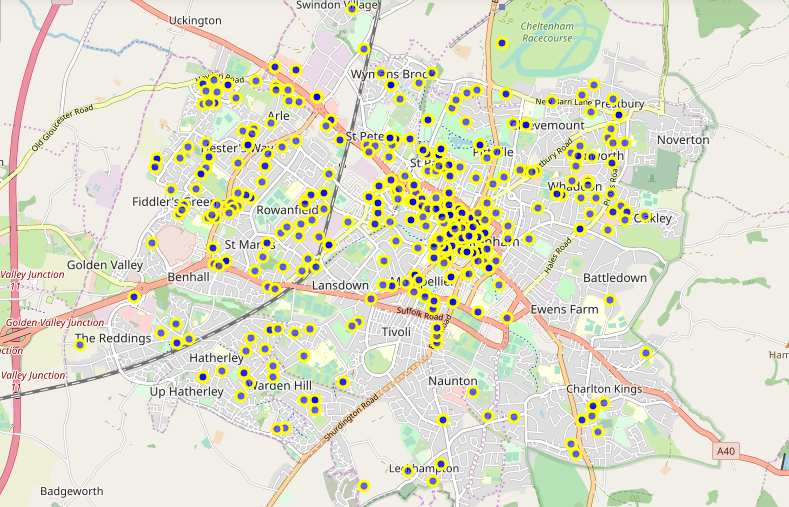

In [10]:
Image("Data_Crime_UK_Gloucestershire_Image 7 zoomed.png")

##### From a simple visual comparison of the maps one can see that the pubs (blue dots) are located towards the areas more densly populated with anti-social behaviour reports (blue with yellow halo), however, the reader should also oberve that there is at least visually not a strict direct link with pub location and anti-social behaviour reports as many cases are not in areas near a pub. 

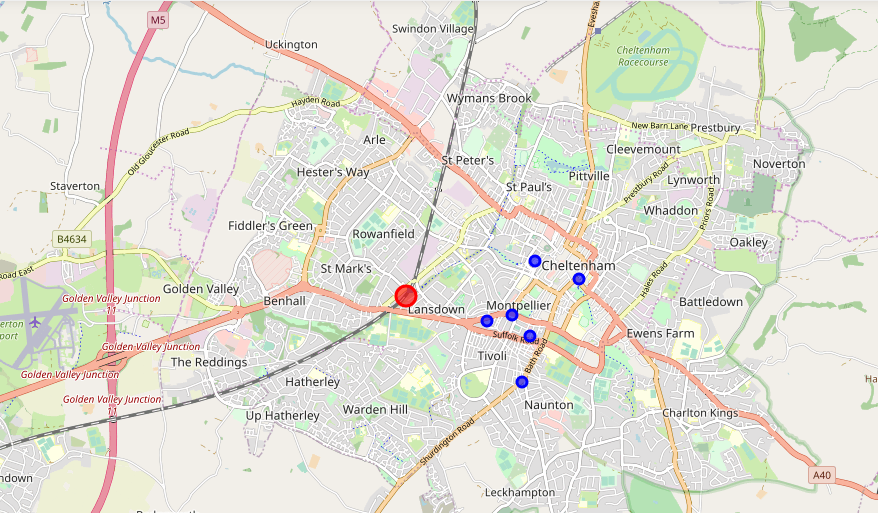

In [11]:
Image("Data_Crime_UK_Gloucestershire_Image 8.png")

##### In an attempt to assess whether quantifiable predictions can be made into crime types based on location, KNN was used to categorise the data in an unsupervised manner and assess quality of categorisation by splitting the data into a traingin set (80% data) vs a test set (20% data) and assessing the accuracy of the predicated categories. Multiple K were assessed with a max of 50 being arbitrarily chosen and the highest accuracy K of 49 being used (Image 9 below). As the graph demonstrates, KNN, which is a very effective machine learning algorithm was unable to predict results accurately much higher than 40%. Below results are are K=49. 
`Train set Accuracy:  0.3985781990521327
 Test set Accuracy:  0.40625`

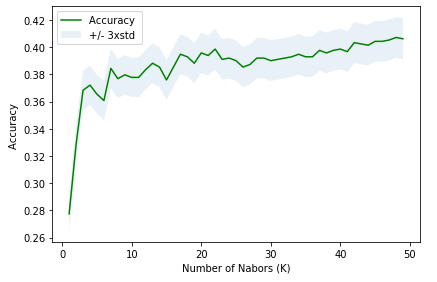

In [12]:
Image("Data_Crime_UK_Gloucestershire_Image 9.png")

##### PCA is another commonly used machine learning algorithm from the `sklearn` library. PCA is used to separate out data points from a dataset into eigenvalues with eigenvectors and separate large datasets into groups according to the largest contributing factors within a dataset. This is based on the assumption that in a complex system, some variables will contribute more than others for a given result. Below in Image 10, a PCA plot is show where the last known outcome of a crime (the crime result) is represented by the colouring of the dots and where the principle components considered are LSOAcodenum (the numeric representation of the general location in the county) and the Locationnum (the numeric representation of the specific street location). 

##### Once again a small general trend can be seen in that the last outcome category (colour) follows a trend of red at the top and purple at the bottom of the graph, but again, this is only a general trend as clearly there is a lot of overlap between the respective groups. 

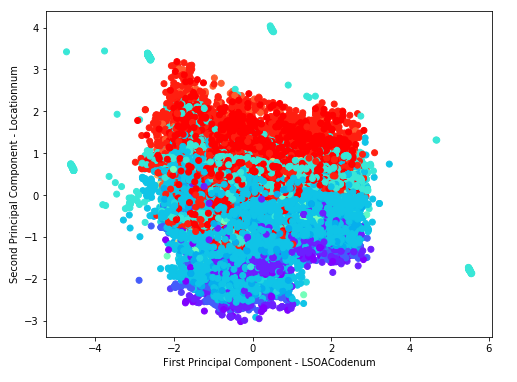

In [13]:
Image("Data_Crime_UK_Gloucestershire_Image 10.png")

### Discussion
#### Crime in relation to weather
##### The initial general assumption that weather may impact crime rates over time appears to be indicated in the initial graphs (Image1-3). It also appears to be the case that this is only one influencing factor as 2017 did not appear to follow the trend of temperature changes through the year as seen in 2018 and 2019 and in addition, March appeared to be dramatically out of the general trend of other years. 

#### Crime in relation to local events
##### Working on the assumption that large events such as sporting events that have a heavy focus on socialising and the potential alcohol consuption that may occur, the largest event that could explain the increase in total crimes in March compared to April in each year and the disproportionate increase seen in 2017 would be the Cheltenham Festival. This is not to suggest that the event itself causes crime, only to note that there is an increase that coincides with it. Further research would be required to assess if the increase would be proportional or disproportional to the total population that would be present in the town at the time i.e. if the increased population size and crime rate were compared to a similarly densly populated town or city, would the crime rate be proportional to the population, or even, lower due to the mainly good nature of tourists and visitors?
#### Crime over time
##### After performing some qualitative research an archive news article from March 2017 (https://www.cheltenham.gov.uk/news/article/1874/keeping_cheltenham_safe_and_moving_during_race_week) noted that:
##### "Councillor Andrew McKinlay, cabinet member for development and safety said:  ‘’We want everyone to have a safe and enjoyable time throughout the festival. Cheltenham welcomes an incredible amount of visitors to the town during race week so it remains a top priority for us to work closely with our partners to make sure everything goes smoothly."
##### and 
##### "’This year the council has even more powers to clamp down on littering, ticket touting and consumption of alcohol so our enforcement officers will be out all hours of the day and night to monitor activity and visit venues.’"
##### and
##### "The council will also be stepping up checks with street trading, public consumption of alcohol, licensed venues and taxi activity."
##### also
##### "Also for the first time, the council in partnership with the police will be cracking down on ticket touts offering for sale race tickets on public land. "
##### This is indicative that there was a change in policy by the council in conjunction with the local police force to change the approach both in a positive manner and in an enforcement manner to clamp down on issues seen in the past. This may be a contributing factor to a longer number of recorded cases of crime and anti-social behaviour. This may also indicate that the change in policy both in positive promotional work and in stricter enforcement of lower level crimes may have been very effective as the total crime rates for both 2018 and 2019 were markely reduced for the same time period in Image 3. 
#### Crime due to proximity to 'Public Houses' (pubs)
##### Although the clustering of the pub locations was in a similar area to the clustering of anti-social behaviour crimes as shown on the maps in Images 7 and 8, this could also be explained by the fact that this is the area of town known as the town centre, where larger number of people are present regardless of what they are doign for their evening. Further research and analysis would be required to assess if this is a significant statistical correlation and an effective comparison made to a similar town or city where no pubs are present. 
#### Predicting crime based on local area codes
##### Although both KNN and PCA were used to assess for predicting crime type and outcomes based on location respectively, only a predictive accuracy of ~40% was made by KNN and a potential general trend seen via PCA. In both cases, no difinitive distinctive predictive powers were produced via the machine learning algorith as implemented on the data presented here. That is not to say that without a larger dataset, or with a better breakdown of crime type and outcome by area with alternative machine learning algorithms that some form of generalised crime prediction could not be made, it is only to demonstrate that in a large complex system, a more sophisticated set of algorithms and or A.I. would be required to make a meaningful real world prediction on a large dataset.

### Conclusion
##### There may be many reasons for the variation seen in the data not covered in this short report and many other variables not considered in this dataset. As this was only an introductory report to the topic of uses and limitations of machine learning in complex systems there are only a fewe take home conclusions:
- Local events, weather, proximity to town centre and specific time points throughout the year all contribute to varying levels of crime.
- Data visualisation is an excellent tool for demonstrating these general insights.
- Machine learning can help identify trends in complex systems but the algorithms used here were not sufficiently sophisticated and the number of variables for the data too few in order to create a high level predictive tool for crime type by location. 
- Further work and research into this area would be fascinating!

### References:
##### https://data.police.uk/data/ - Crime data.
##### https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-climate-averages - UK weather average temperature data.
##### https://foursquare.com/developers/apps - FourSquare API calls.
##### https://www.cheltenham.gov.uk/news/article/1874/keeping_cheltenham_safe_and_moving_during_race_week - Archived news report regarding change to policing approach in March 2017. 
